In [1]:
import torch
import torch as th
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import einops
# Import necessary librar

In [5]:
data_dir = '/n/home12/binxuwang/Github/DiffusionReasoning/'
attr_all = np.load(data_dir+'attr_all.npy')
print(attr_all.shape)

def preprocess_ids(attr_seq_tsr, ):
    """ Add 1 to all attribute values, such that -1 becomes 0. 
    then the index is valid as token. """
    attr_seq_tsr_pps = attr_seq_tsr.clone() + 1
    return attr_seq_tsr_pps

attr_all_rows = torch.tensor(attr_all)
attr_tsr = einops.rearrange(attr_all_rows,  'class (B R) p (h w) attr -> class B attr (R h) (p w)', h=3,w=3,p=3,R=3)
# attr_seq_tsr = einops.rearrange(attr_tsr,  'class B attr (R h) (p w) -> (class B) (R p h w) attr', h=3,w=3,p=3,R=3)
# attr_seq_tsr_pps = preprocess_ids(attr_seq_tsr)
Xmean = torch.tensor([1.5, 2.5, 2.5]).view(1, 1, 3, 1, 1)
Xstd = torch.tensor([2.5, 3.5, 3.5]).view(1, 1, 3, 1, 1)
attr_tsr_norm = (attr_tsr - Xmean) / Xstd

(40, 12000, 3, 9, 3)


In [6]:
attr_tsr_norm_vec = einops.rearrange(attr_tsr_norm, 'class B attr (R h) (p w) -> class B (attr R h p w)', h=3,w=3,p=3,R=3)


In [7]:
# compute the spectrum of each class and plot it
U, S, V = torch.svd(attr_tsr_norm_vec[0].cuda())

In [13]:
from tqdm import tqdm, trange

In [14]:
U_col = []
S_col = []
V_col = []
for iclass in trange(40):
    U, S, V = torch.svd(attr_tsr_norm_vec[iclass].cuda())
    U_col.append(U.cpu())
    S_col.append(S.cpu())
    V_col.append(V.cpu())

100%|██████████| 40/40 [00:00<00:00, 62.87it/s]


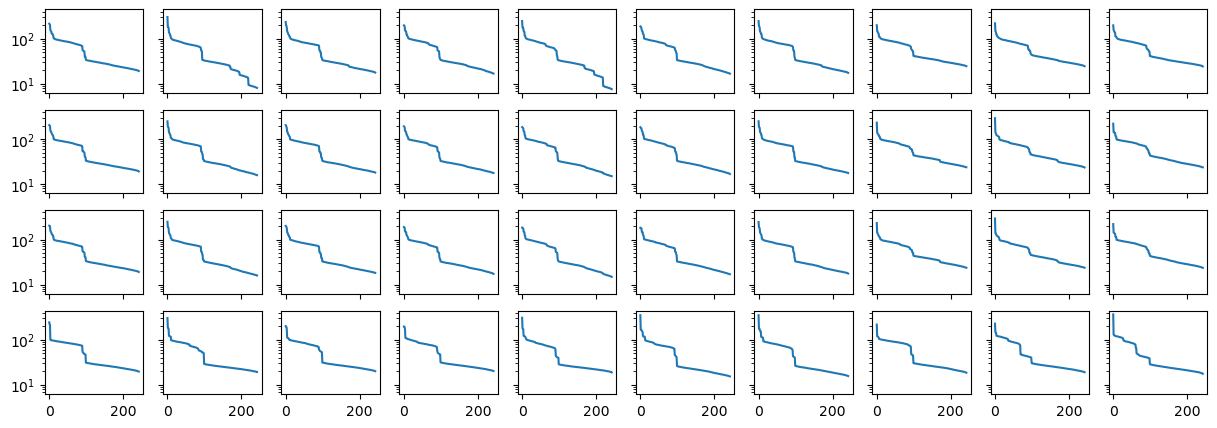

In [17]:
import matplotlib.pyplot as plt
figh, axs = plt.subplots(4, 10, figsize=(15, 5), sharex=True, sharey=True)
for axi, ax in enumerate(axs.flatten()):
    ax.semilogy(S_col[axi])
figh.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

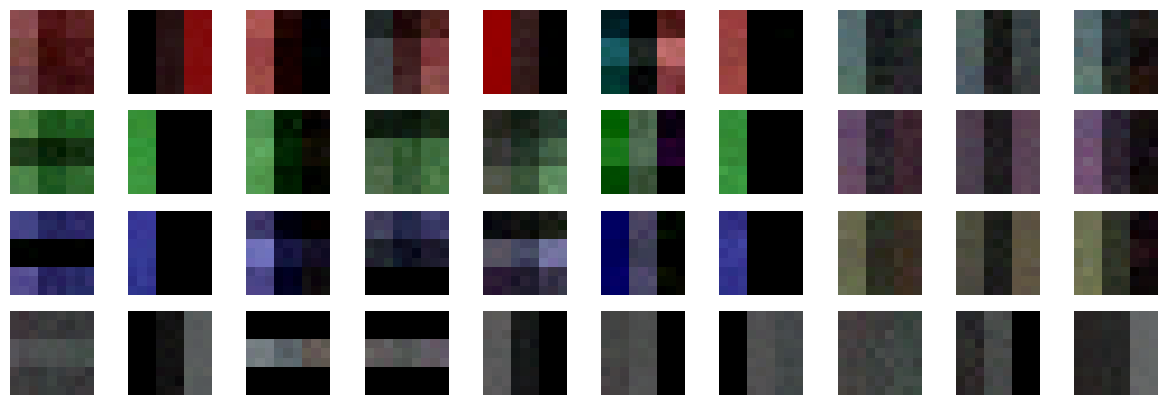

In [51]:
import matplotlib.pyplot as plt
PCi = 0
figh, axs = plt.subplots(4, 10, figsize=(15, 5), sharex=True, sharey=True)
for axi, ax in enumerate(axs.flatten()):
    V_imgtsr = V_col[axi][:,PCi].reshape(3,9,9)
    if V_imgtsr.mean() < 0:
        V_imgtsr = -V_imgtsr    
    ax.imshow(4*V_imgtsr.cpu().numpy().transpose(1,2,0))
    ax.axis('off')
    # ax.semilogy(S_col[axi])
figh.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


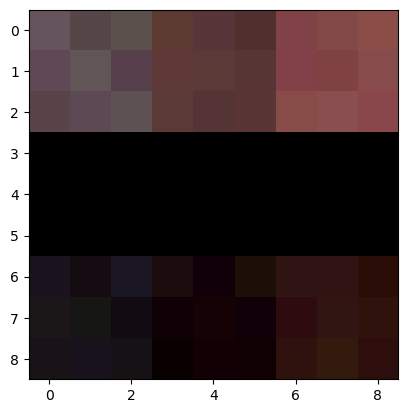

In [48]:
V_imgtsr = V_col[3][:,1].reshape(3,9,9)
if V_imgtsr.mean() < 0:
    V_imgtsr = -V_imgtsr
plt.figure()
plt.imshow(4*V_imgtsr.cpu().numpy().transpose(1,2,0))
plt.show()

In [ ]:
import matplotlib.pyplot as plt
figh, axs = plt.subplots(4, 10, figsize=(15, 5), sharex=True, sharey=True)
for axi, ax in enumerate(axs.flatten()):
    ax.semilogy(S_col[axi])
figh.show()